In [85]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


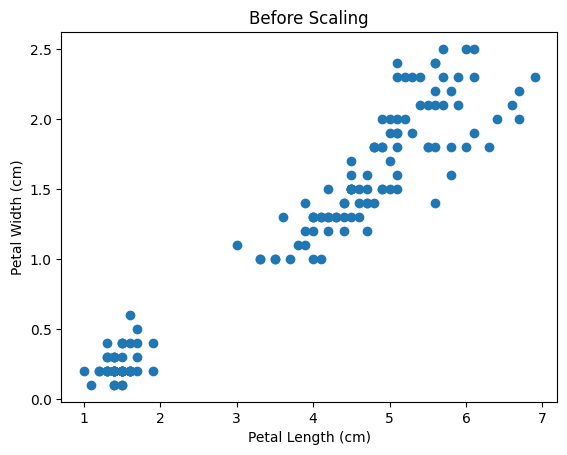

In [86]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.title('Before Scaling')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [87]:
scaler = MinMaxScaler()
df[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df[['petal length (cm)', 'petal width (cm)']])

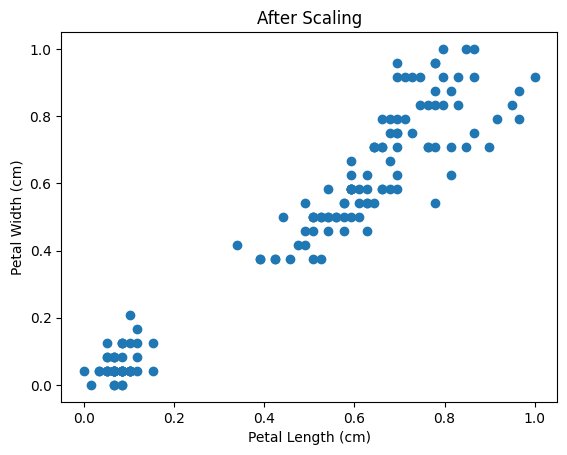

In [88]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.title('After Scaling')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

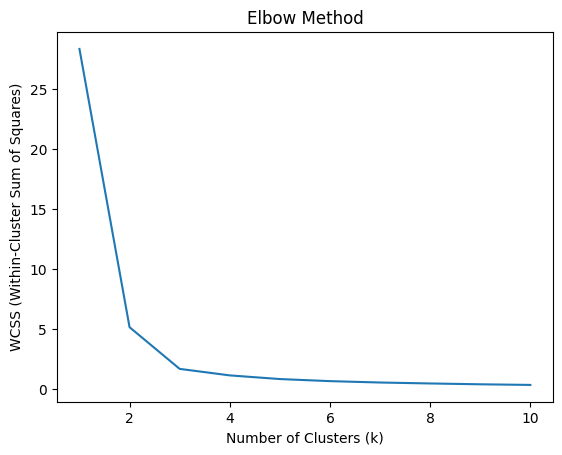

In [89]:
wcss = []
k_rng = range(1, 11)

for k in k_rng:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['petal length (cm)', 'petal width (cm)']])
    wcss.append(kmeans.inertia_)

plt.plot(k_rng, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [90]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5           0.067797          0.041667   
1                4.9               3.0           0.067797          0.041667   
2                4.7               3.2           0.050847          0.041667   
3                4.6               3.1           0.084746          0.041667   
4                5.0               3.6           0.067797          0.041667   

   flower  cluster  
0       0        1  
1       0        1  
2       0        1  
3       0        1  
4       0        1  


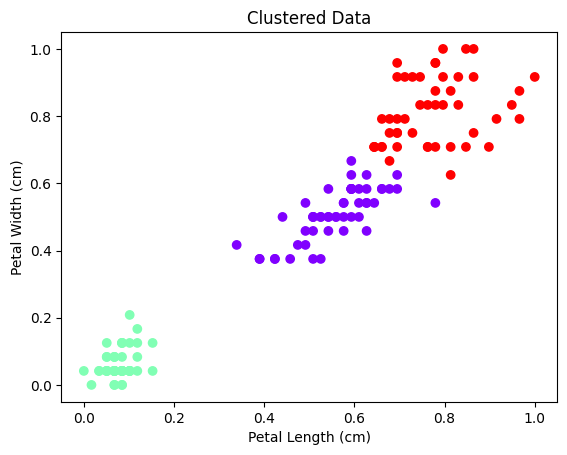

In [91]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'], cmap='rainbow')
plt.title('Clustered Data')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()